# Convolutional Neural Network (CNN)
- Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in computer vision tasks. They are especially effective in tasks like image classification and object detection.

In [148]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks
import matplotlib.pyplot as plt


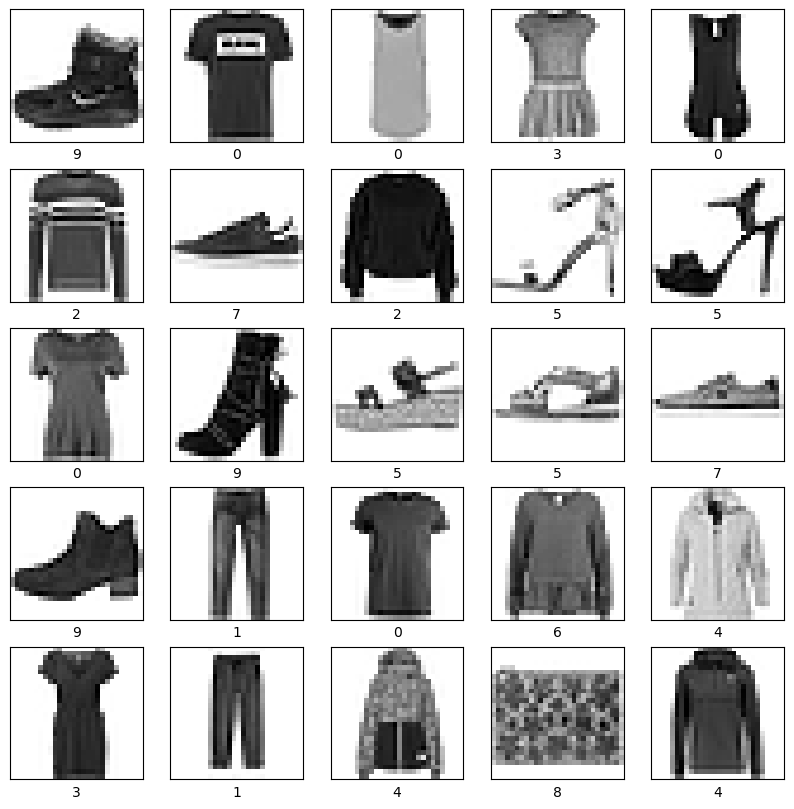

In [149]:
# Load dataset
(X_train, y_train), (X_test, y_test) = ks.datasets.fashion_mnist.load_data()

# Display some samples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [150]:
# Explore the dataset
print(f'We have {X_train.shape[0]} training samples and {X_test.shape[0]} test samples.')
print(f'The size of the image is {X_train[0].shape}, It means each sample has {X_train.shape[1]} rows and {X_train.shape[2]} columns.')
print('-----------------------------------------------------')
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_test is {y_test.shape}')

We have 60000 training samples and 10000 test samples.
The size of the image is (28, 28), It means each sample has 28 rows and 28 columns.
-----------------------------------------------------
The shape of X_train is (60000, 28, 28)
The shape of y_train is (60000,)
The shape of X_test is (10000, 28, 28)
The shape of y_test is (10000,)


In [151]:
len(X_train)

60000

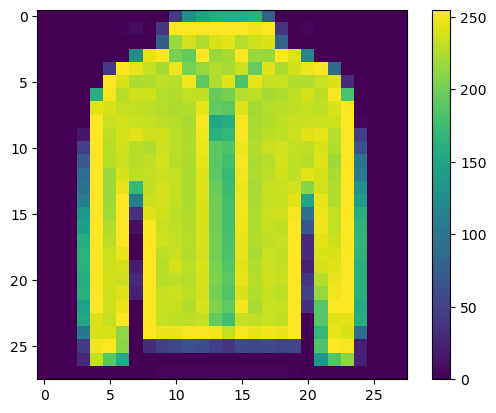

In [152]:
plt.figure()
plt.imshow(X_train[399])
plt.colorbar()
plt.grid(False)
plt.show()

In [153]:
# Display the pixels of the image
print('Pixel values')
for row in X_train[399]:
    for pixel in row:
        print('{:3}'.format(pixel), end=' ')
    print()

Pixel values
  0   0   0   0   0   0   0   0   0   0  46 125 147 157 158 157 165  77   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   1   1   2   8   0  40 255 255 255 255 255 255 249 255  38   0   4   0   0   0   0   0   0   0 
  0   0   0   1   0   0   0   0   0  75 217 239 225 240 245 227 237 242  82   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0 127 247 255 203 195 255 217 222 255 217 216 255 242 116   0   0   0   0   0   0   0 
  0   0   0   0   0  42 255 246 233 221 249 204 215 226 223 235 195 243 224 237 249 255  88   0   0   0   0   0 
  0   0   0   0   0 255 240 224 225 231 228 250 191 225 244 183 246 233 234 226 225 234 242  33   0   0   0   0 
  0   0   0   0 160 252 228 236 236 227 226 232 231 196 203 227 230 222 225 231 239 229 252 183   0   0   0   0 
  0   0   0   0 245 240 232 232 230 227 224 226 246 193 190 243 221 227 229 231 233 231 241 254   0   0   0   0 
  0   0   0   0 255 234 238 234 232 230 228 223 254 153 158 253 223 226 231 233 235

In [154]:
# Normalize the data
X_train = (X_train / 255).astype(np.float32)
X_test = (X_test / 255).astype(np.float32)

In [155]:
# lets check the normalized data
print('Pixel values')
for row in X_train[399]:
    for pixel in row:
        print('{:0.2f}'.format(pixel), end=' ')
    print()

Pixel values
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.18 0.49 0.58 0.62 0.62 0.62 0.65 0.30 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.03 0.00 0.16 1.00 1.00 1.00 1.00 1.00 1.00 0.98 1.00 0.15 0.00 0.02 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.29 0.85 0.94 0.88 0.94 0.96 0.89 0.93 0.95 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.97 1.00 0.80 0.76 1.00 0.85 0.87 1.00 0.85 0.85 1.00 0.95 0.45 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.16 1.00 0.96 0.91 0.87 0.98 0.80 0.84 0.89 0.87 0.92 0.76 0.95 0.88 0.93 0.98 1.00 0.35 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 1.00 0.94 0.88 0.88 0.91 0.89 0.98 0.75 0.88 0.96 0.72 0.96 0.91 0.92 0.89 0.88 0.92 0.95 0.13 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.63 0.99 0.89 0.93 0.93 0.89 0.89 0.91 0.91 0.77 0.80 0.89 0.90 0.87 0.88 0.91 0.94 0.90 0.99 0.72 0.00 0.00 0.00 0.00 


In [156]:
# Reshape the images to have a channel dimension
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [157]:
# lets create a model
model = ks.Sequential([
    ks.layers.Input(shape=(28, 28, 1)), # input layer
    ks.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # convolutional layer
    ks.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # convolutional layer
    ks.layers.MaxPooling2D(pool_size=(3, 3)), # max pooling layer
    ks.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # convolutional layer
    ks.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # convolutional layer
    ks.layers.MaxPooling2D(), # max pooling layer

    ks.layers.Flatten(), # flatten layer
    ks.layers.Dense(10, activation='softmax') # output layer

])
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# check the model summary
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_134 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_135 (Conv2D)             │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_136 (Conv2D)             │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_137 (Conv2D)             │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,562 (263.91 KB)

 Trainable params: 67,562 (263.91 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
# train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7265 - loss: 0.7513 - val_accuracy: 0.8765 - val_loss: 0.3534
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.8727 - loss: 0.3493 - val_accuracy: 0.8923 - val_loss: 0.2990
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8984 - loss: 0.2762 - val_accuracy: 0.8987 - val_loss: 0.2844
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9101 - loss: 0.2480 - val_accuracy: 0.9008 - val_loss: 0.2674
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9193 - loss: 0.2200 - val_accuracy: 0.9020 - val_loss: 0.2712
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9275 - loss: 0.1963 - val_accuracy: 0.9105 - val_loss: 0.2479
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9339 - loss: 0.1837 - val_accuracy: 0.9119 - val_loss: 0.2454
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9408 -

In [159]:
# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9004 - loss: 0.3357

Test accuracy: 0.9016000032424927

Test loss: 0.30492833256721497


In [160]:
# Save the model to models folder
model.save('models/fashion_mnist.keras')

# Make predictions

In [161]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [162]:
predictions[0]

array([2.24705339e-08, 3.94673172e-13, 2.11323375e-10, 5.92835003e-10,
       3.55193874e-09, 4.56025191e-06, 9.83940751e-09, 1.82002346e-04,
       1.09810124e-07, 9.99813259e-01], dtype=float32)

In [163]:
np.argmax(predictions[0])

9

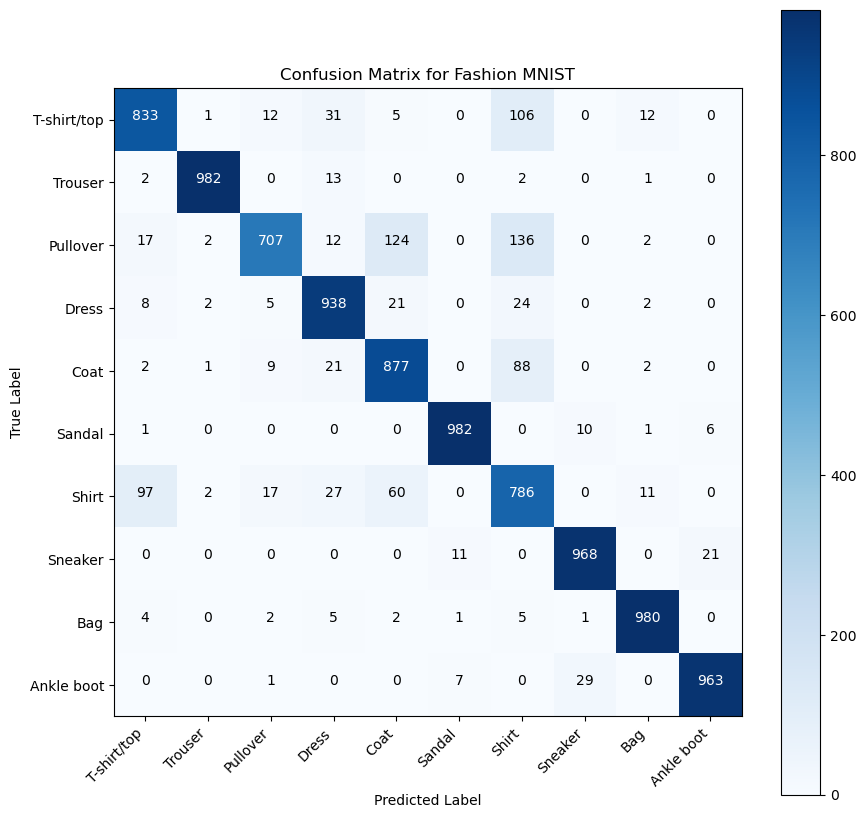

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained predictions
# predictions: model outputs (probabilities or logits)
# test_labels: true labels

# Convert continuous predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Define the class labels for Fashion MNIST
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fashion MNIST')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45, ha="right")
plt.yticks(tick_marks, class_labels)

# Add values to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.subplots_adjust(left=0.2, bottom=0.2)  # Fix layout issue
plt.show()
